In [ ]:
# # Save cropped image of a player
# for track_id, player in tracks["players"][0].items():
#     bbox = player['bbox']
#     frame = video_frames[0]
#     # crop bbox from frame
#     cropped_image = frame[int(bbox[1]): int(bbox[3]), int(bbox[0]): int(bbox[2])]
#     # save the cropped image
#     cv2.imwrite(f'output_videos/cropped_image.jpg', cropped_image)
#     # we just want one image
#     break

# Library imports

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Load the image

In [2]:
images_path = "../output_videos/cropped_image.jpg"
img = cv2.imread(images_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

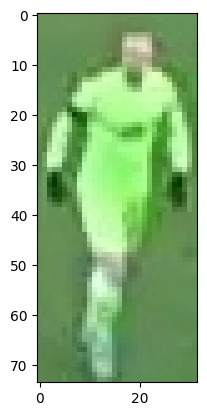

In [3]:
# we have the whole image, but we just want the top half of it, because this is where the player has its t-shirt
plt.imshow(img)

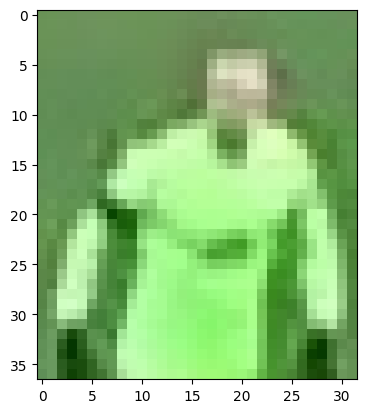

In [4]:
top_half_image = img[0: int(img.shape[0] / 2), :]  # we can do this because this is a numpy array
plt.imshow(top_half_image)

# Cluster the image into two clusters

In [18]:
print(top_half_image.shape)

(37, 32, 3)


In [19]:
# reshape the image into 2d array
img_2d = top_half_image.reshape(-1, 3)
print(img_2d.shape)

(1184, 3)


In [20]:
# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(img_2d)

KMeans(n_clusters=2, random_state=0)

In [21]:
# get the cluster labels
labels = kmeans.labels_
print(labels.shape)

(1184,)


In [25]:
# reshape the labels to the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])
print(clustered_image.shape)
print(clustered_image)

(37, 32)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


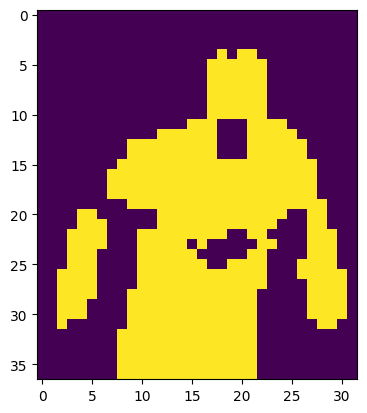

In [26]:
# display the clustered image
plt.imshow(clustered_image)

In [28]:
# segment the image based on the cluster labels
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [29]:
kmeans.cluster_centers_[player_cluster]

array([172.34166667, 238.12291667, 147.70833333])